In [111]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv("telecom_users.csv")

In [113]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [115]:
""" Here we are going to convert the Object values from our dataset into index values (dummy variables) according to the legend.txt file """


d = {'Male': 0, 'No':0, 'No phone service':0, 'No internet service':0, 'Credit card (automatic)':0, 'Month-to-month':0, 'Female':1, 'Yes':1, 'Bank transfer (automatic)': 1, 'One year': 1, 'Fiber optic': 1, 'Electronic check': 2, 'Two year': 2, 'DSL': 2, 'Mailed check':3}
for column in df:
    df[column] = df[column].map(d).fillna(df[column])


In [116]:
""" now let's take a look at the updated dataset. """
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869.0,7010-BRBUU,0,0.0,1,1,72.0,1,1,0,...,0,0,0,0,2,0,0,24.10,1734.65,0
1,4528.0,9688-YGXVR,1,0.0,0,0,44.0,1,0,1,...,1,0,1,0,0,1,0,88.15,3973.2,0
2,6344.0,9286-DOJGF,1,1.0,1,0,38.0,1,1,1,...,0,0,0,0,0,1,1,74.95,2869.85,1
3,6739.0,6994-KERXL,0,0.0,0,0,4.0,1,0,2,...,0,0,0,1,0,1,2,55.90,238.5,0
4,432.0,2181-UAESM,0,0.0,0,0,2.0,1,0,2,...,1,0,0,0,0,0,2,53.45,119.5,0


In [117]:
""" The first two columns have no descriptiong and seem unrelated to the rest of the data.
to be sure about this, let's check the correlation of 'Unnamed:0' with 'Churn'. """

test = df[['Unnamed: 0', 'Churn']]
test.corr()

,Unnamed: 0,Churn
Unnamed: 0,1.00000,0.00663
Churn,0.00663,1.00000


In [118]:
""" As we can see there is no significant correlation so we can drop it along with cx id. """
df = df.drop(['Unnamed: 0', 'customerID'], axis=1)


In [119]:
""" one last thing to do to clean up our data is to convert the type of 'TotalChages' from an object to a float. """


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

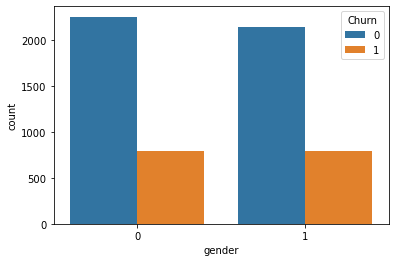

In [120]:
""" here we can see if there is any significant diffence in Churn rate between men and women. """
sns.countplot(data = df, x = 'gender', hue = 'Churn');

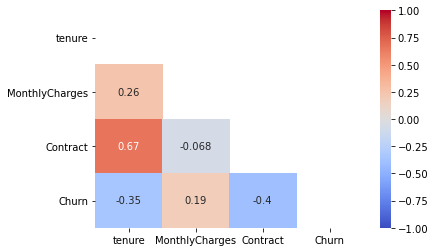

In [121]:
""" from my experience, I beleive that tenure, contract term, and monthly charges
will be the most importand factors in determining Churn  """

important = df[['tenure', 'MonthlyCharges', 'Contract', 'Churn']]


important_corr = important.copy()
mask = np.zeros_like(important_corr.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(important_corr.corr(), annot = True, cmap="coolwarm", mask = mask, vmin = -1, vmax = 1);



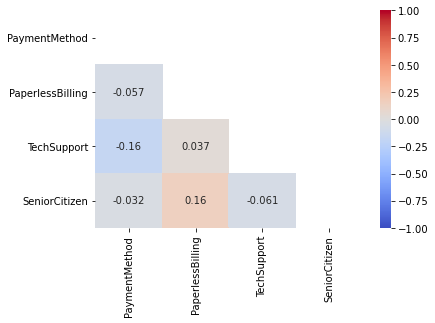

In [122]:
"""I'd also be curious to see what the relation between self-serve options and age would look like. """
selfserve = df[['PaymentMethod', 'PaperlessBilling', 'TechSupport', 'SeniorCitizen']]
selfserve.PaymentMethod.map({0:0, 1:0, 2:1, 3:1})

selfserve_corr = selfserve.copy()
mask = np.zeros_like(important_corr.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(selfserve_corr.corr(), annot = True, cmap="coolwarm", mask = mask, vmin = -1, vmax = 1);

In [123]:
""" now lets split the data into training and testing sets for the prediction """
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test, = train_test_split(X,y,test_size = 0.3, random_state=0)

scale_min = StandardScaler()
X_train = scale_min.fit_transform(X_train)
X_test = scale_min.transform(X_test)


In [124]:
""" We're going to use a logistic regression for classification here since we're dealing mostly with categorical data
and we want to keep this as simple as possible """
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(random_state=0, max_iter = 1000)
lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0)

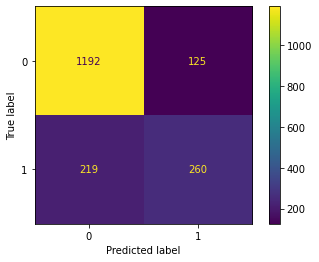

In [125]:


from sklearn.metrics import plot_confusion_matrix, classification_report
plot_confusion_matrix(lg, X_test, y_test)



In [126]:
y_pred = lg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1317
           1       0.68      0.54      0.60       479

    accuracy                           0.81      1796
   macro avg       0.76      0.72      0.74      1796
weighted avg       0.80      0.81      0.80      1796



In [127]:
""" although the results from the logistic regression were quite good overall (80% accuracy)
the amount of false negatives was a little to high for this type of situation. Let's see if a support vector machine
performs better for this metric. """

from sklearn.svm import SVC
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=0)

scale_min = StandardScaler()
X_train_2 = scale_min.fit_transform(X_train_2)
X_test_2 = scale_min.transform(X_test_2)


sv = SVC(max_iter = 10000, C = 0.9, class_weight = 'balanced', kernel = 'poly', degree = 4, gamma = 'scale')


sv.fit(X_train_2, y_train_2)

SVC(C=0.9, class_weight='balanced', degree=4, kernel='poly', max_iter=10000)

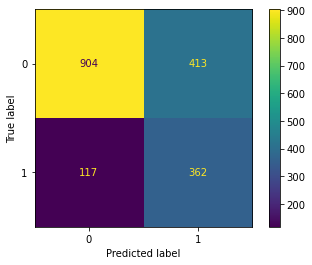

In [128]:
plot_confusion_matrix(sv, X_test_2, y_test_2);

In [129]:
""" So we can see that the number of false negatives is quite a bit lower with the SVM
but it appears to have come at the cost of accuracy overall. """
y_pred_2 = sv.predict(X_test_2)

print(classification_report(y_test_2, y_pred_2 ))

              precision    recall  f1-score   support

           0       0.89      0.69      0.77      1317
           1       0.47      0.76      0.58       479

    accuracy                           0.70      1796
   macro avg       0.68      0.72      0.68      1796
weighted avg       0.77      0.70      0.72      1796

